# Linear Regression

### Predicting medical cost charged to each individual by insurance company

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
#Loading insurance data
data = pd.read_csv('insurance.csv')

In [3]:
#View the top 10 rows
data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [4]:
# Check for null values using isnull().sum()
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

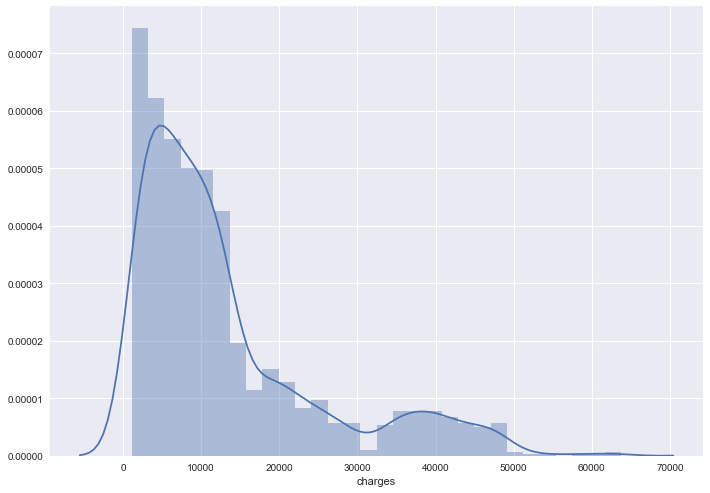

In [5]:
#Distribution of Charges using sns.distplot

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(data['charges'], bins = 30)
plt.show()

In [6]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
#LabelEncoder is used to treat categorical variables for Linear Regression Model
#Linear Regression model does not work on categorical variables
#We need to convert categorical variables into numerical variables
#LabelEncoder - To Encode labels with value between 0 and n_classes-1

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [8]:
#We have 3 variables which are categorical (Sex, Smoker, Region)

#Sex
le.fit(data.sex.drop_duplicates())
data.sex = le.transform(data.sex)

#Smoker
le.fit(data.smoker.drop_duplicates())
data.smoker = le.transform(data.smoker)

#Region
le.fit(data.region.drop_duplicates())
data.region = le.transform(data.region)

In [9]:
#View the updated data
data.head()

#Sex:      Female - 0 ; Male - 1
#Smoker:   Yes - 1 ; Smoker No - 0
#Region:   Southwest - 3 ; Southeast - 2 ; Northwest - 1 ; Northeast - 0

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [10]:
#To view the columns
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [11]:
#Seperating independent and dependent variables for the model
X = data[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
Y = data['charges']

In [12]:
#Splitting the data into 60-40%
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.4)

In [13]:
#Fitting the Linear Regression Model on Train Data
lm = LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [14]:
#Predictions on Test Data
test_predictions = lm.predict(X_test)

In [15]:
#Coefficients of Linear Model

coefficients = pd.DataFrame(lm.coef_, X.columns)
coefficients.columns = ['coefficients']
coefficients

,coefficients
age,261.785847
sex,472.197678
bmi,308.694477
children,414.168541
smoker,23792.067759
region,-312.222759


### Interpret Coefficients

- For one unit increase in age, the charges increase by approx 260
- If smoker is 1 (Yes), then the charges will increase by approx 23700

In [16]:
# model evaluation for test set
print('MAE:', metrics.mean_absolute_error(Y_test, test_predictions))
print('MSE:', metrics.mean_squared_error(Y_test, test_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, test_predictions)))
print('R2:', r2_score(Y_test, test_predictions))

MAE: 4231.168302858354
MSE: 40495680.06859083
RMSE: 6363.6216157618
R2: 0.7187861376379996


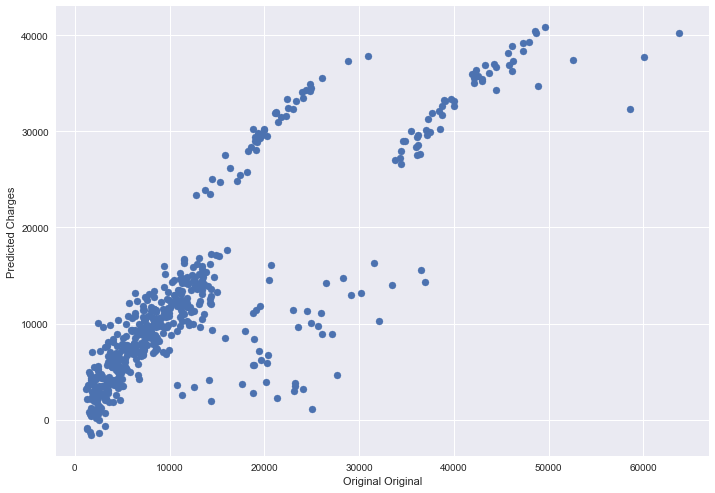

In [17]:
#Scatter Plot for Predicted vs Original Values

plt.scatter(Y_test, test_predictions)
plt.xlabel('Original Original')
plt.ylabel('Predicted Charges')
plt.show()

---

### References:

### Medical Cost Personal Data
- https://www.kaggle.com/mirichoi0218/insurance